In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [3]:
root = os.getcwd()
train_csv = os.path.join(root, 'CSV', 'written_name_train.csv')
val_csv = os.path.join(root, 'CSV', 'written_name_validation.csv')
train_img_dir = os.path.join(root, 'train_v2', 'train')
test_img_dir = os.path.join(root, 'test_v2', 'test')
val_img_dir = os.path.join(root, 'validation_v2', 'validation')
df = pd.read_csv(train_csv)
print(df.head())
print(f'Total number of samples: {len(df)}')
print(df.isnull().sum())
print(df['IDENTITY'].describe())


          FILENAME   IDENTITY
0  TRAIN_00001.jpg  BALTHAZAR
1  TRAIN_00002.jpg      SIMON
2  TRAIN_00003.jpg      BENES
3  TRAIN_00004.jpg    LA LOVE
4  TRAIN_00005.jpg     DAPHNE
Total number of samples: 330961
FILENAME      0
IDENTITY    565
dtype: int64
count     330396
unique    100539
top       THOMAS
freq        1825
Name: IDENTITY, dtype: object


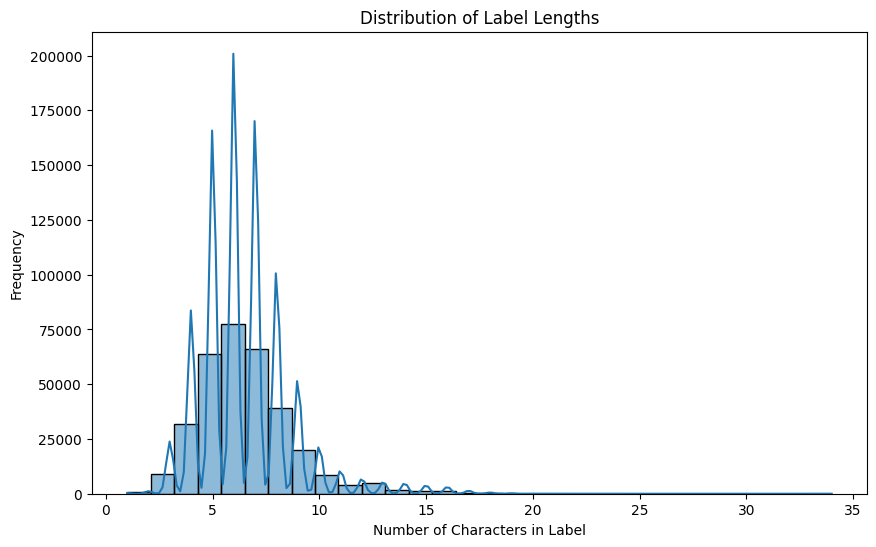

Number of unique characters: 50
Unique characters: [' ', "'", '-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '`', 'a', 'b', 'c', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'y', 'z']


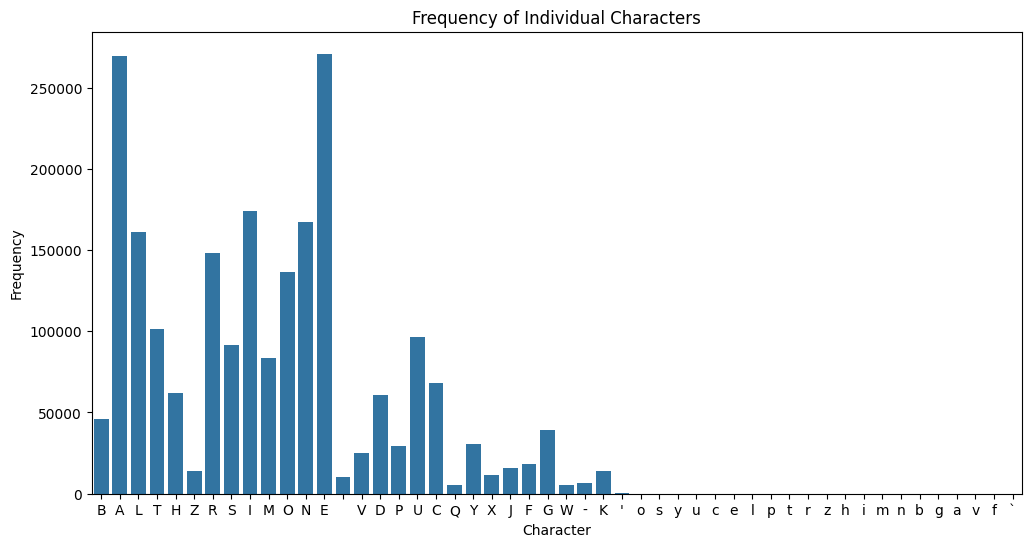

In [3]:
df['IDENTITY'] = df['IDENTITY'].astype(str)
df = df[df['IDENTITY'].notnull() & (df['IDENTITY'] != 'nan')]
df['label_length'] = df['IDENTITY'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['label_length'], bins=30, kde=True)
plt.title('Distribution of Label Lengths')
plt.xlabel('Number of Characters in Label')
plt.ylabel('Frequency')
plt.show()

# The most frequent labels (characters)
all_labels = ''.join(df['IDENTITY'].values)
unique_characters = set(all_labels)

print(f'Number of unique characters: {len(unique_characters)}')
print(f'Unique characters: {sorted(unique_characters)}')

# Visualize the frequency of individual characters
from collections import Counter
char_counts = Counter(all_labels)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(char_counts.keys()), y=list(char_counts.values()))
plt.title('Frequency of Individual Characters')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.show()


In [7]:
duplicate_images = df[df.duplicated(subset=['FILENAME'])]
print(f'Duplicate images: {len(duplicate_images)}')
unusual_labels = df[df['label_length'] > 20]  
print(f'Number of unusual labels (length > 20): {len(unusual_labels)}')
print(unusual_labels)


Duplicate images: 0
Number of unusual labels (length > 20): 20
                FILENAME                            IDENTITY  label_length
9502     TRAIN_09503.jpg            DARE DE NAISSANCE CLASSE            24
10278    TRAIN_10279.jpg               DOSSANTOS LASCONCELOS            21
28769    TRAIN_28770.jpg              PERETTI ANNE CHARLOTTE            22
39214    TRAIN_39215.jpg  CAPUCINE CAPUCINE MARIE PHILIPPINE            34
67064    TRAIN_67065.jpg              COLANONICO - - AICARDI            22
79663    TRAIN_79664.jpg             DE LA VALLEE DE PIMODAI            23
80310    TRAIN_80311.jpg             ANGEL MICHELL OU INDICI            23
108567  TRAIN_108568.jpg               O ZUARRDI EREBEVITRAC            21
122049  TRAIN_122050.jpg              DU THEILLET DE LA MOTH            22
156500  TRAIN_156501.jpg               ANDRIANNARISOA--DEGHI            21
160575  TRAIN_160576.jpg               LOUISIANE - EVANGELIN            21
174121  TRAIN_174122.jpg             

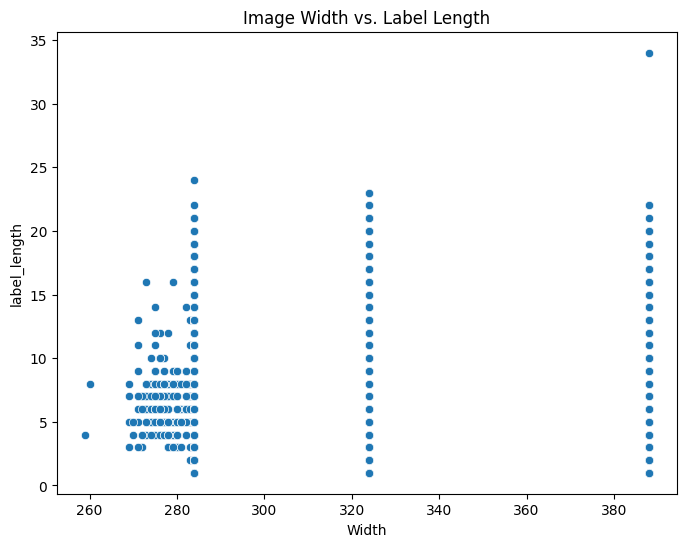

In [8]:
image_sizes = []

for img_name in df['FILENAME']:
    img_path = os.path.join(train_img_dir, img_name)  
    
    try:
        with Image.open(img_path) as img:
            image_sizes.append(img.size)  
    except Exception as e:
        print(f"Error opening image {img_name}: {e}")
        image_sizes.append((None, None)) 

df['Width'], df['Height'] = zip(*image_sizes)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Width'], y=df['label_length'])
plt.title('Image Width vs. Label Length')
plt.show()


In [5]:
def get_image_dimensions(folder):
    image_data = {'filename': [], 'width': [], 'height': []}
    
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                image_data['filename'].append(filename)
                image_data['width'].append(width)
                image_data['height'].append(height)
    
    return pd.DataFrame(image_data)

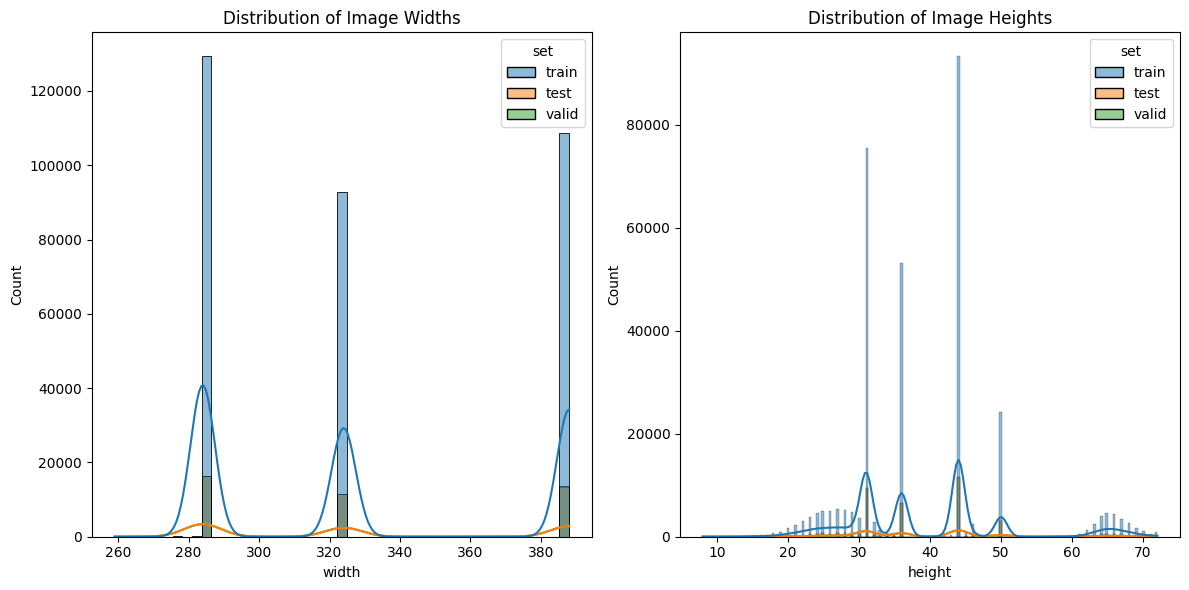

In [6]:
train_df = get_image_dimensions(train_img_dir)
test_df = get_image_dimensions(test_img_dir)
valid_df = get_image_dimensions(val_img_dir)

train_df['set'] = 'train'
test_df['set'] = 'test'
valid_df['set'] = 'valid'

all_data = pd.concat([train_df, test_df, valid_df], ignore_index=True)

plt.figure(figsize=(12, 6))

# Width Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=all_data, x='width', hue='set', kde=True)
plt.title('Distribution of Image Widths')
  
# Height Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=all_data, x='height', hue='set', kde=True)
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()